# Generate preset samples

This notebook is intended to generate a family of sampling presets that improves the performance of object spangling.

In [2]:
%load_ext autoreload
%autoreload 2
from pryngles import *
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sphere presets

In [2]:
"""
SAMPLER_SPHERE_PRESETS=np.array(
    list(np.arange(100,1000,100))+\
    list(np.arange(1000,2000,200))+\
    list(np.arange(2000,3000,300))+\
    list(np.arange(3000,4000,400))+\
    list(np.arange(4000,5000,500))+\
    [5000]
)
preset=2480
N=SAMPLER_PRESETS[abs(preset-SAMPLER_PRESETS).argmin()]
N,SAMPLER_PRESETS,len(SAMPLER_PRESETS)

preset="sphere"
N=4480
self=Sampler()
exec(f"self.N=SAMPLER_{preset.upper()}_PRESETS[abs({N}-SAMPLER_{preset.upper()}_PRESETS).argmin()]")
self.N
#""";

In [3]:
for N in tqdm(SAMPLER_SPHERE_PRESETS):
    sp=Sampler(N=N)
    sp.gen_sphere()
    sp.purge_sample()
    sp.save_to(Misc.get_data(f"sampler_presets/sample_sphere_N_{N}.pkl"))

100%|██████████| 24/24 [00:32<00:00,  1.35s/it]


## Test presets

<IPython.core.display.Javascript object>


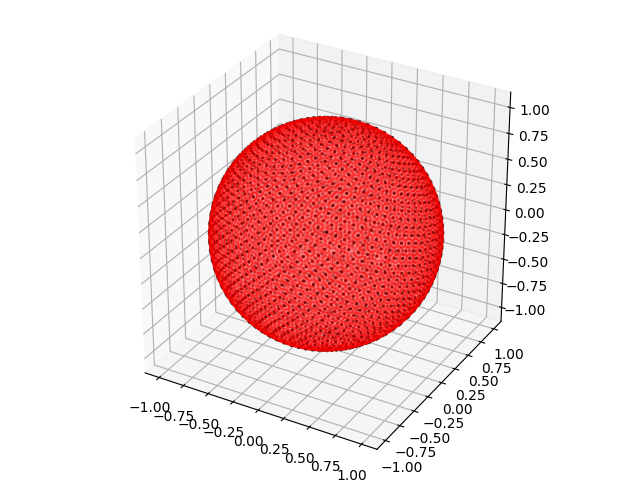

In [4]:
N=2300
sp=Sampler(filename=Misc.get_data(f"sampler_presets/sample_sphere_N_{N}.pkl"))
sp.plot(spangled=dict(color='r'))

<IPython.core.display.Javascript object>


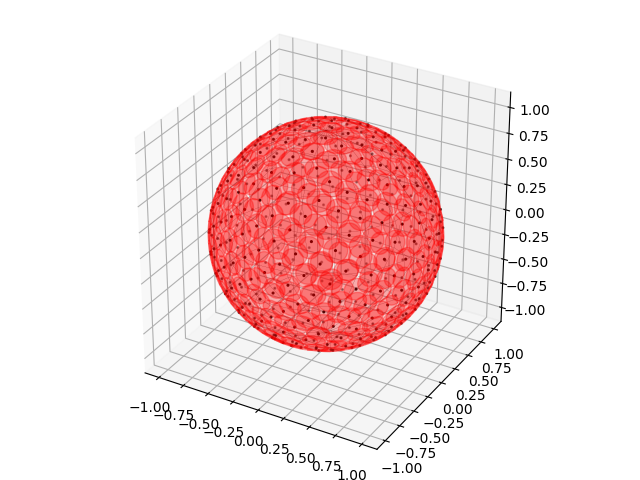

In [7]:
N=364
sp=Sampler(N=N,preset="sphere")
sp.plot(spangled=dict(color='r'))

## Generate disk

In [125]:
N=1000
fi=0.7
Neff=int(1/(1-fi**2)*N)
Neff

1960

In [119]:
sp=Sampler(N=Neff)
sp.N

1960

<IPython.core.display.Javascript object>


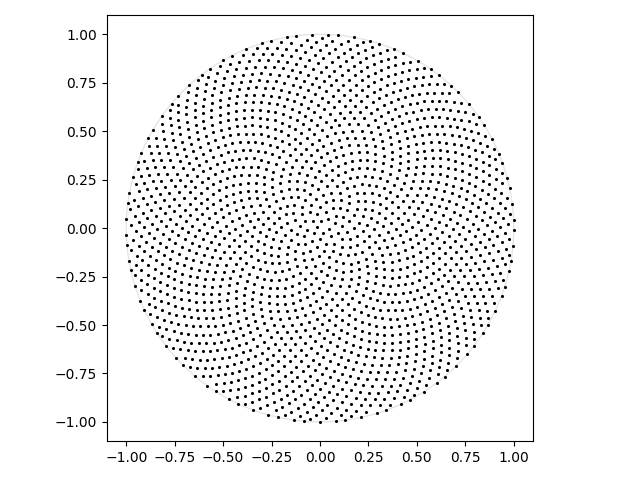

In [120]:
sp.gen_circle()
sp.plot()

In [121]:
cond=~((sp.pp[:,1]>0)&(sp.pp[:,0]<fi))

In [122]:
sp.pp=sp.pp[cond]
sp.ss=sp.ss[cond]
sp.N=len(sp.pp)
sp.N

1022

<IPython.core.display.Javascript object>


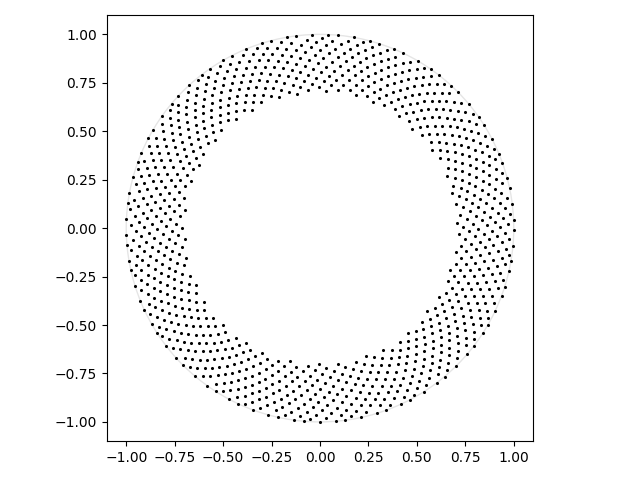

In [123]:
sp.plot()